In [2]:
import os, sys

import numpy as np
import pandas as pd

import anndata
import scanpy as sc
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import rcParams


In [3]:
path = '/Users/busracagirici/Documents/scrnaseq/citeseq/'
save_tables = '/Users/busracagirici/Documents/scrnaseq/citeseq/tables/'
save_figures = '/Users/busracagirici/Documents/scrnaseq/citeseq/figures/'


In [3]:
adata = sc.read_h5ad(path + 'data/merged_dengue_and_covid_all.h5ad')
adata

AnnData object with n_obs × n_vars = 966804 × 42244
    obs: 'Age', 'Condition', 'DENV_minus', 'DENV_plus', 'DENV_reads', 'Gender', 'ID', 'batch', 'cell_quality', 'cell_subtype', 'cell_subtype_2', 'cell_subtype_zhiyuan', 'cell_type', 'cell_type_zhiyuan', 'cell_type_new_2', 'doublets', 'mt_frac', 'n_counts', 'n_genes', 'platform', 'viral_load_nano', 'viral_load_qpcr', 'Dengue_exposure', 'cell_subtype_luca', 'cell_subtype_new', 'cell_type_luca', 'cell_type_new', 'cell_subtype_NK', 'Dataset', 'Admission', 'Sample', 'Stage', 'Experiment', 'Date', 'Date of symptoms onset', 'Days', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'mad_prd', 'n_proteins_by_counts', 'total_counts_adt', 'total_counts_log1p', 'total_counts_adt_log1p', 'rna_quality', 'protein_quality', 'high_quality', 'TCR_umi', 'TCR_umi_log1p', 'TCR_IR_VJ_2_c_call', 'TCR_IR_VDJ_2_c_call', 'TCR_IR_VJ_2_d_call', 'TCR_IR_VDJ_2_d_call', 'TCR_IR_VJ_2_v_call', 'TCR_IR_VDJ_

In [4]:
adata.obs.Dataset.unique()

['Children_viscRNAseq', 'Adults_viscRNAseq', 'Adults_citeseq', 'Meyer_nikolic', 'Arunachalam2020']
Categories (5, object): ['Adults_citeseq', 'Adults_viscRNAseq', 'Arunachalam2020', 'Children_viscRNAseq', 'Meyer_nikolic']

In [5]:
adata[(adata.obs.Dataset == 'Arunachalam2020') & (adata.obs.Condition=='Healthy')].obs.ID.unique()


['280', '259', '279', '265', '258']
Categories (5, object): ['258', '259', '265', '279', '280']

In [6]:
adata[(adata.obs.Dataset == 'Children_viscRNAseq') & (adata.obs.Condition=='Healthy')].obs.ID.unique()


['3_012_01', '3_037_01', '3_047_01', '3_074_01']
Categories (4, object): ['3_012_01', '3_037_01', '3_047_01', '3_074_01']

In [7]:
filtered = adata[(adata.obs.ID.isin(['1-056-01', '1-172-01', '1_003_1', '1_053_01', '1_183_01',
                                          '1_001_1', '1_013_01', '1_026_02', '1_036_02', '5_049_01',
                                           '1_019_01', '6_023_01', '5_030_01', '5_193_01', '5_154_01', 
                                            '6_001_01', '5_041_01', '1_140_01', '1_144_01', '5_044_01', 
                                            '1_002_01', '1_113_01', '5_010_01', '5_130_01',
                                           '3_012_01', '3_037_01', '3_047_01', '3_074_01',
                                           '280', '259', '279', '265', '258',
                                          ]) & 
                 (adata.obs.cell_type_new.isin(['NK cells', 'Monocytes', 'cDCs', 'pDCs', 'T cells', 'B cells', 'Plasmablasts'])))].copy()

sc.pp.normalize_total(filtered, target_sum=1e6)
sc.pp.log1p(filtered, base=2)
filtered.raw = filtered

del(adata)
filtered

AnnData object with n_obs × n_vars = 177056 × 42244
    obs: 'Age', 'Condition', 'DENV_minus', 'DENV_plus', 'DENV_reads', 'Gender', 'ID', 'batch', 'cell_quality', 'cell_subtype', 'cell_subtype_2', 'cell_subtype_zhiyuan', 'cell_type', 'cell_type_zhiyuan', 'cell_type_new_2', 'doublets', 'mt_frac', 'n_counts', 'n_genes', 'platform', 'viral_load_nano', 'viral_load_qpcr', 'Dengue_exposure', 'cell_subtype_luca', 'cell_subtype_new', 'cell_type_luca', 'cell_type_new', 'cell_subtype_NK', 'Dataset', 'Admission', 'Sample', 'Stage', 'Experiment', 'Date', 'Date of symptoms onset', 'Days', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'mad_prd', 'n_proteins_by_counts', 'total_counts_adt', 'total_counts_log1p', 'total_counts_adt_log1p', 'rna_quality', 'protein_quality', 'high_quality', 'TCR_umi', 'TCR_umi_log1p', 'TCR_IR_VJ_2_c_call', 'TCR_IR_VDJ_2_c_call', 'TCR_IR_VJ_2_d_call', 'TCR_IR_VDJ_2_d_call', 'TCR_IR_VJ_2_v_call', 'TCR_IR_VDJ_

In [9]:
filtered.obs.cell_quality.cat.categories

Index(['high'], dtype='object')

In [51]:
filtered.obs.Dengue_exposure.unique()

['Primary', 'no', 'Secondary', 'ndet', NaN]
Categories (4, object): ['Primary', 'Secondary', 'ndet', 'no']

In [70]:
filtered.obs.Dengue_exposure.fillna('no', inplace=True)

In [71]:
df = filtered.obs.groupby(['Dataset', 'Condition', 'ID', 'Dengue_exposure']).size()
df = df[df!=0]
df

Dataset              Condition  ID        Dengue_exposure
Adults_citeseq       D          1-056-01  Secondary           6861
                                1-172-01  Secondary           2793
                                1_003_1   Secondary          20001
                                1_053_01  Secondary           5666
                                1_183_01  Secondary           6176
                     SD         1_001_1   Secondary           7462
                                1_013_01  Secondary           5661
                                1_026_02  Secondary           7262
                                1_036_02  Primary             9060
                                5_049_01  Primary             5411
Adults_viscRNAseq    SD         1_013_01  no                   122
Arunachalam2020      Healthy    258       no                  4553
                                259       no                  3475
                                265       no                  7299
    

In [75]:
def plot_gene_expression(filtered, ct, gene, ylabel=f'{gene} (log1p(CPM))', figsize=[4, 3]):
    import matplotlib.pyplot as plt
    from statannotations.Annotator import Annotator
    from matplotlib import rcParams
    rcParams['font.size']=8
    
    adata_tmp = filtered[filtered.obs.cell_type_new == ct].copy()
    df = sc.get.obs_df(adata_tmp, 
                   keys = ['cell_type_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure', gene],
                  )
    df = df.groupby(['cell_type_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure']).mean().dropna().loc[ct]
    df = df.reset_index().set_index(['Dataset', 'Condition'])
    df['order'] = df.index.map({('Arunachalam2020', 'Healthy'): 'a_H',
         ('Adults_citeseq', 'D'): 'a_D',
         ('Adults_citeseq', 'SD'): 'a_SDp',
         ('Children_viscRNAseq', 'Healthy'): 'p_H',
         ('Children_viscRNAseq', 'D'): 'p_D',
         ('Children_viscRNAseq', 'SD'): 'p_SDp',})


    order = ['a_H', 'a_D', 'a_SDp', 'p_H', 'p_D', 'p_SDp']
    pairs = [('a_H', 'a_D'),
            ('a_H', 'a_SDp'),
            ('a_D', 'a_SDp'),
            ('p_H', 'p_D'),
            ('p_H', 'p_SDp'),
            ('p_D', 'p_SDp'),
            ('a_D', 'p_D'),
            ('a_SDp', 'p_SDp'),
           ]
    #cmap = sns.color_palette('Set2', 6)
    hue_plot_params = {'data': df,
                   'x' : 'order', 
                   'y' : gene, 
                   'order': order,
                   'zorder' : 8,
                   'boxprops': {'edgecolor':'none'}, 
                   'medianprops' : {'color':'black', 'linewidth':0.5},
                   'capprops' : {'color':'none'},
                   'palette' : ['whitesmoke', 'silver', 'dimgray',], 
                   'width' : 0.8, 
                   'showfliers': False}

    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(ax=ax, **hue_plot_params).legend(bbox_to_anchor=(1, 1))

    empty_box=False
    if empty_box:
        for i,box in enumerate([p for p in ax.patches if not p.get_label()]): 
            color = box.get_facecolor()
            box.set_edgecolor(color)
            box.set_facecolor((0, 0, 0, 0))
            # iterate over whiskers and median lines
            for j in range(5*i,5*(i+1)):
                ax.lines[j].set_color(color)

            
    sns.stripplot(data = df.dropna(), 
              x = 'order', y = gene, order=order, zorder=10,
             #palette=cmap, 
                  palette = ['tomato', 'blue', 'gray', 'gray'],
                  hue = 'Dengue_exposure', hue_order = ['Primary', 'Secondary', 'ndet', 'no'],
                  s=2, ax=ax, edgecolor='black', linewidth=0.3, dodge=True).legend('')


    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.new_plot(ax, **hue_plot_params)
    annotator.configure(test="Mann-Whitney", comparisons_correction="BH", 
                    text_format="full", verbose=False, show_test_name=False).apply_and_annotate()

    ax.legend(loc=(1.05, 0.5))
    ax.set_ylabel(ylabel, fontsize='medium')
    labels = [x.get_text() for x in ax.get_xticklabels()]
    ax.set_xticklabels(['H', 'D', 'SDp', 'H', 'D', 'SDp',], rotation=0, fontsize='medium')
    ax.set_xlabel('Adults                                Children', fontsize='medium')
    ax.set_axisbelow(True)
    #ax.grid(True)


    #plt.savefig(f'{figure_path}{gene}_allpvals.svg')
    fig.tight_layout()
    #plt.savefig(f'{figure_path}{gene}_allpvals.png')
    plt.show()
    return(fig, ax)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


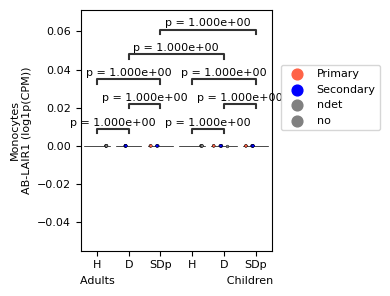

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


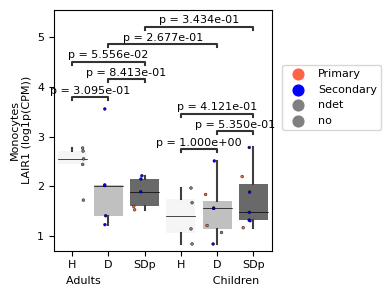

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


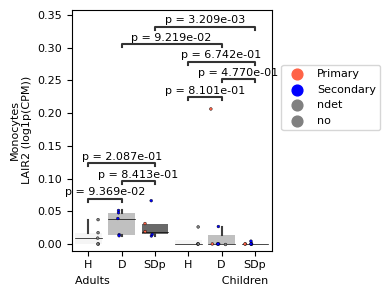

In [74]:
genes = ['AB-LAIR1', 'LAIR1', 'LAIR2'
        ]
ct = 'Monocytes'
for gene in genes:
    fig, ax = plot_gene_expression(filtered, ct, gene, ylabel = f'{ct}\n{gene} (log1p(CPM))')

In [104]:
def plot_gene_expression(filtered, cts, gene, ylabel=f'{gene} (log1p(CPM))', figsize=[20, 3]):
    import matplotlib.pyplot as plt
    from statannotations.Annotator import Annotator
    from matplotlib import rcParams
    rcParams['font.size']=8
    
    fig, axs = plt.subplots(1, len(cts), figsize=figsize)
    
    for ax, ct in zip(axs, cts):
        adata_tmp = filtered[filtered.obs.cell_type_new == ct].copy()
        df = sc.get.obs_df(adata_tmp, 
                   keys = ['cell_type_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure', gene],
                  )
        df = df.groupby(['cell_type_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure']).mean().dropna().loc[ct]
        df = df.reset_index().set_index(['Dataset', 'Condition'])
        df['order'] = df.index.map({('Arunachalam2020', 'Healthy'): 'a_H',
         ('Adults_citeseq', 'D'): 'a_D',
         ('Adults_citeseq', 'SD'): 'a_SDp',
         ('Children_viscRNAseq', 'Healthy'): 'p_H',
         ('Children_viscRNAseq', 'D'): 'p_D',
         ('Children_viscRNAseq', 'SD'): 'p_SDp',})


        order = ['a_H', 'a_D', 'a_SDp', 'p_H', 'p_D', 'p_SDp']
        pairs = [('a_H', 'a_D'),
            ('a_H', 'a_SDp'),
            ('a_D', 'a_SDp'),
            ('p_H', 'p_D'),
            ('p_H', 'p_SDp'),
            ('p_D', 'p_SDp'),
            ('a_D', 'p_D'),
            ('a_SDp', 'p_SDp'),
           ]
        #cmap = sns.color_palette('Set2', 6)
        hue_plot_params = {'data': df,
                   'x' : 'order', 
                   'y' : gene, 
                   'order': order,
                   'zorder' : 8,
                   'boxprops': {'edgecolor':'none'}, 
                   'medianprops' : {'color':'black', 'linewidth':0.5},
                   'capprops' : {'color':'none'},
                   'palette' : ['whitesmoke', 'silver', 'dimgray',], 
                   'width' : 0.8, 
                   'showfliers': False}

        sns.boxplot(ax=ax, **hue_plot_params).legend(bbox_to_anchor=(1, 1))

        empty_box=False
        if empty_box:
            for i,box in enumerate([p for p in ax.patches if not p.get_label()]): 
                color = box.get_facecolor()
                box.set_edgecolor(color)
                box.set_facecolor((0, 0, 0, 0))
                # iterate over whiskers and median lines
                for j in range(5*i,5*(i+1)):
                    ax.lines[j].set_color(color)

            
        sns.stripplot(data = df.dropna(), 
              x = 'order', y = gene, order=order, zorder=10,
             #palette=cmap, 
                  palette = ['tomato', 'blue', 'gray', 'gray'],
                  hue = 'Dengue_exposure', hue_order = ['Primary', 'Secondary', 'ndet', 'no'],
                  s=4, ax=ax, edgecolor='black', linewidth=0.3, dodge=True).legend('')


#        # Add annotations
#        annotator = Annotator(ax, pairs, **hue_plot_params)
#        annotator.new_plot(ax, **hue_plot_params)
#        annotator.configure(test="Mann-Whitney", comparisons_correction="BH", #text_format="full", 
#                            text_format='star', pvalue_thresholds=[[0.0001, '***'], [0.001, '**'], [0.05, '*'], [1, '']],
#                            verbose=False, show_test_name=False).apply_and_annotate()
        
        if ax == axs[0]: ax.set_ylabel(ylabel, fontsize='medium')
        else: ax.set_ylabel('')
        
        labels = [x.get_text() for x in ax.get_xticklabels()]
        ax.set_xticklabels(['H', 'D', 'SDp', 'H', 'D', 'SDp',], rotation=0, fontsize='medium')
        ax.set_xlabel('Adults          Children', fontsize='medium')
#        ax.set_xlabel('Adults                                Children', fontsize='medium')
        ax.set_axisbelow(True)
        ax.set_ylim(0,7.4)
        
        ax.set_title(f'{ct}')
        #ax.grid(True)
        
        if ax == axs[-1]: ax.legend(loc=(1.05, 0.5))
        else: ax.get_legend().remove()
            
    #plt.savefig(f'{figure_path}{gene}_allpvals.svg')
    fig.tight_layout()
    #plt.savefig(f'{figure_path}{gene}_allpvals.png')
    plt.show()
    return(fig, axs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


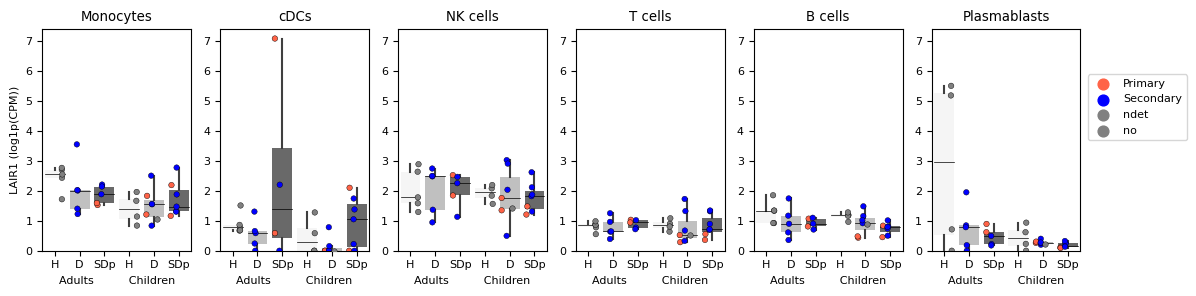

In [105]:
gene = 'LAIR1'
cts = ['Monocytes', 'cDCs', 'NK cells', 'T cells', 'B cells', 'Plasmablasts']
fig, axs = plot_gene_expression(filtered, cts, gene, ylabel = f'{gene} (log1p(CPM))', figsize=[12, 3])


In [134]:
def plot_gene_expression(filtered, cts, gene, ylabel=f'{gene} (log1p(CPM))', figsize=[20, 3], ylim=12):
    import matplotlib.pyplot as plt
    from statannotations.Annotator import Annotator
    from matplotlib import rcParams
    rcParams['font.size']=8
    
    fig, axs = plt.subplots(1, len(cts), figsize=figsize)
    
    for ax, ct in zip(axs, cts):
        adata_tmp = filtered[filtered.obs.cell_subtype_new == ct].copy()
        df = sc.get.obs_df(adata_tmp, 
                   keys = ['cell_subtype_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure', gene],
                  )
        df = df.groupby(['cell_subtype_new', 'Dataset', 'Condition', 'ID', 'Dengue_exposure']).mean().dropna().loc[ct]
        df = df.reset_index().set_index(['Dataset', 'Condition'])
        df['order'] = df.index.map({('Arunachalam2020', 'Healthy'): 'a_H',
         ('Adults_citeseq', 'D'): 'a_D',
         ('Adults_citeseq', 'SD'): 'a_SDp',
         ('Children_viscRNAseq', 'Healthy'): 'p_H',
         ('Children_viscRNAseq', 'D'): 'p_D',
         ('Children_viscRNAseq', 'SD'): 'p_SDp',})


        order = ['a_H', 'a_D', 'a_SDp', 'p_H', 'p_D', 'p_SDp']
        pairs = [('a_H', 'a_D'),
            ('a_H', 'a_SDp'),
            ('a_D', 'a_SDp'),
            ('p_H', 'p_D'),
            ('p_H', 'p_SDp'),
            ('p_D', 'p_SDp'),
            ('a_D', 'p_D'),
            ('a_SDp', 'p_SDp'),
           ]
        #cmap = sns.color_palette('Set2', 6)
        hue_plot_params = {'data': df,
                   'x' : 'order', 
                   'y' : gene, 
                   'order': order,
                   'zorder' : 8,
                   'boxprops': {'edgecolor':'none'}, 
                   'medianprops' : {'color':'black', 'linewidth':0.5},
                   'capprops' : {'color':'none'},
                   'palette' : ['whitesmoke', 'silver', 'dimgray',], 
                   'width' : 0.8, 
                   'showfliers': False}

        sns.boxplot(ax=ax, **hue_plot_params).legend(bbox_to_anchor=(1, 1))

        empty_box=False
        if empty_box:
            for i,box in enumerate([p for p in ax.patches if not p.get_label()]): 
                color = box.get_facecolor()
                box.set_edgecolor(color)
                box.set_facecolor((0, 0, 0, 0))
                # iterate over whiskers and median lines
                for j in range(5*i,5*(i+1)):
                    ax.lines[j].set_color(color)

            
        sns.stripplot(data = df.dropna(), 
              x = 'order', y = gene, order=order, zorder=10,
             #palette=cmap, 
                  palette = ['tomato', 'blue', 'gray', 'gray'],
                  hue = 'Dengue_exposure', hue_order = ['Primary', 'Secondary', 'ndet', 'no'],
                  s=4, ax=ax, edgecolor='black', linewidth=0.3, dodge=True).legend('')


#        # Add annotations
#        annotator = Annotator(ax, pairs, **hue_plot_params)
#        annotator.new_plot(ax, **hue_plot_params)
#        annotator.configure(test="Mann-Whitney", comparisons_correction="BH", text_format="full", 
#                            #text_format='star', pvalue_thresholds=[[0.0001, '***'], [0.001, '**'], [0.05, '*'], [1, '']],
#                            verbose=False, show_test_name=False).apply_and_annotate()
        
        if ax == axs[0]: ax.set_ylabel(ylabel, fontsize='medium')
        else: ax.set_ylabel('')
        
        labels = [x.get_text() for x in ax.get_xticklabels()]
        ax.set_xticklabels(['H', 'D', 'SDp', 'H', 'D', 'SDp',], rotation=0, fontsize='medium')
        ax.set_xlabel('Adults          Children', fontsize='medium')
#        ax.set_xlabel('Adults                                Children', fontsize='medium')
        ax.set_axisbelow(True)
        ax.set_ylim(-0.7,ylim)
        
        ax.set_title(f'{ct}')
        #ax.grid(True)
        
        if ax == axs[-1]: ax.legend(loc=(1.05, 0.5))
        else: ax.get_legend().remove()
            
    #plt.savefig(f'{figure_path}{gene}_allpvals.svg')
    fig.tight_layout()
    #plt.savefig(f'{figure_path}{gene}_allpvals.png')
    plt.show()
    return(fig, axs)


list(filtered.obs.cell_subtype_new.unique())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


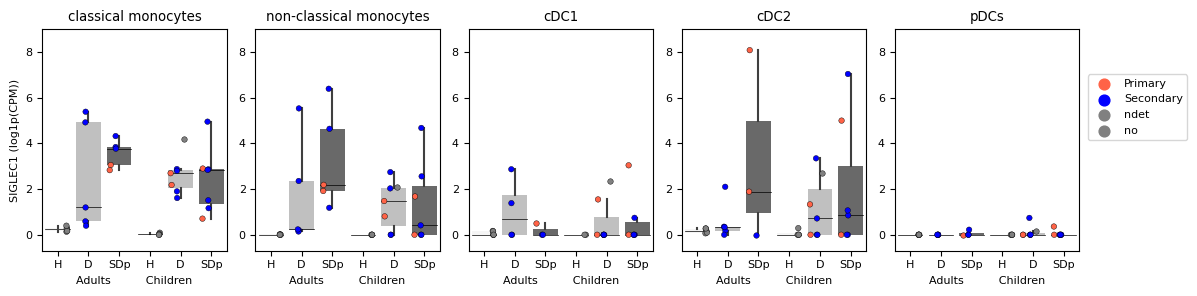

In [137]:
gene = 'SIGLEC1'
cts = ['classical monocytes', 'non-classical monocytes', 'cDC1', 'cDC2', 'pDCs',]
fig, axs = plot_gene_expression(filtered, cts, gene, ylabel = f'{gene} (log1p(CPM))', figsize=[12, 3], ylim=9)


In [4]:
def plot_gene_expression(filtered, cts, gene='SIGLEC1', ylabel=f'SIGLEC1 (log1p(CPM))', figsize=[20, 3], ylim=12):
    import matplotlib.pyplot as plt
    from statannotations.Annotator import Annotator
    from matplotlib import rcParams
    rcParams['font.size']=8
    
    fig, axs = plt.subplots(1, len(cts), figsize=figsize)
    
    for ax, ct in zip(axs, cts):
        adata_tmp = filtered[filtered.obs.rna_ct_3 == ct].copy()
        df = sc.get.obs_df(adata_tmp, 
                   keys = ['rna_ct_3', 'Condition', 'ID', 'Dengue_exposure', gene],
                  )
        df = df.groupby(['rna_ct_3', 'Condition', 'ID', 'Dengue_exposure']).mean().dropna().loc[ct]
        df = df.reset_index().set_index(['Condition'])
        order = ['D', 'SD',]

        hue_plot_params = {'data': df.reset_index(),
                   'x' : 'Condition', 
                   'y' : gene, 
                   'order': order,
                   'zorder' : 8,
                   'boxprops': {'edgecolor':'none'}, 
                   'medianprops' : {'color':'black', 'linewidth':0.5},
                   'capprops' : {'color':'none'},
                   'palette' : ['whitesmoke', 'silver', 'dimgray',], 
                   'width' : 0.8, 
                   'showfliers': False}

        sns.boxplot(ax=ax, **hue_plot_params).legend(bbox_to_anchor=(1, 1))

        empty_box=False
        if empty_box:
            for i,box in enumerate([p for p in ax.patches if not p.get_label()]): 
                color = box.get_facecolor()
                box.set_edgecolor(color)
                box.set_facecolor((0, 0, 0, 0))
                # iterate over whiskers and median lines
                for j in range(5*i,5*(i+1)):
                    ax.lines[j].set_color(color)

            
        sns.stripplot(data = df.reset_index().dropna(), 
              x = 'Condition', y = gene, order=order, zorder=10,
             #palette=cmap, 
                  palette = ['tomato', 'blue', 'gray', 'gray'],
                  hue = 'Dengue_exposure', hue_order = ['Primary', 'Secondary', 'ndet', 'no'],
                  s=4, ax=ax, edgecolor='black', linewidth=0.3, dodge=True).legend('')


        if ax == axs[0]: ax.set_ylabel(ylabel, fontsize='medium')
        else: ax.set_ylabel('')
        
        labels = [x.get_text() for x in ax.get_xticklabels()]
        ax.set_xticklabels(['D', 'SDp', #'H', 'D', 'SDp',
                           ], rotation=0, fontsize='medium')
        ax.set_xlabel('Adults', fontsize='medium')
#        ax.set_xlabel('Adults                                Children', fontsize='medium')
        ax.set_axisbelow(True)
        ax.set_ylim(-0.7,ylim)
        
        ct = '\n'.join(ct.split())
        ax.set_title(f'{ct}')
        #ax.grid(True)
        
        if ax == axs[-1]: ax.legend(loc=(1.05, 0.5))
        else: ax.get_legend().remove()
            
    #plt.savefig(f'{figure_path}{gene}_allpvals.svg')
    fig.tight_layout()
    #plt.savefig(f'{figure_path}{gene}_allpvals.png')
    plt.show()
    return(fig, axs)


In [5]:
adata = sc.read_h5ad(path + 'data/merged_citeseq_040224_7.h5ad')

filtered = adata[(adata.obs.total_counts >= 1000) &
                  #(adata.obs.total_counts <= 30000) &
                  (adata.obs.n_genes_by_counts >= 400) &
                  (adata.obs.pct_counts_mt < 15) &
                  #(adata.obs.total_counts_adt <= 10000) &
                  #(adata.obs.predicted_doublets == False) &
                  (adata.obs.mad_prd == False) &
                 (~adata.obs.ID.isin(['1_052_02', '1_052_01', '1_057_02', '1_057_01',])) &
                 (~adata.obs.ID.isin(['1_013_01',])) &
                (~adata.obs.Condition.isin(['co', 'DWS']))
                 ].copy()
filtered = filtered[(filtered.obs.ID.isin(['1-056-01', '1-172-01', '1_003_1', '1_053_01', '1_183_01',
                                          '1_001_1', '1_013_01', '1_026_02', '1_036_02', '5_049_01',
                                           '1_019_01', '6_023_01', '5_030_01', '5_193_01', '5_154_01', 
                                            '6_001_01', '5_041_01', '1_140_01', '1_144_01', '5_044_01', 
                                            '1_002_01', '1_113_01', '5_010_01', '5_130_01'
                                          ]))].copy()
filtered = filtered[:, [x for x in filtered.var_names if not x.startswith('Isotype')]]
sc.pp.filter_genes(filtered, min_cells=3)
filtered.X = filtered.layers['dsb'].copy()
filtered = filtered[filtered.obs.rna_ct_2_2.isin(['NK cells', 'Monocytes', 'cDCs', 'pDCs', 'T cells', 'B cells', 'Plasmablasts', 'Platelets',])].copy()
filtered.obs.rna_ct_2_2.cat.reorder_categories(['NK cells', 'Monocytes', 'cDCs', 'pDCs', 'T cells', 'B cells', 'Plasmablasts', 'Platelets', ], inplace=True)
del(adata)
del(filtered.layers['clr'])

filtered

AnnData object with n_obs × n_vars = 70752 × 27274
    obs: 'Age', 'Gender', 'Condition', 'Admission', 'ID', 'Sample', 'Stage', 'Experiment', 'Dengue_exposure', 'Date', 'Date of symptoms onset', 'Days', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'mad_prd', 'n_proteins_by_counts', 'total_counts_adt', 'total_counts_log1p', 'total_counts_adt_log1p', 'rna_quality', 'protein_quality', 'high_quality', 'TCR_umi', 'TCR_umi_log1p', 'TCR_IR_VJ_2_c_call', 'TCR_IR_VDJ_2_c_call', 'TCR_IR_VJ_2_d_call', 'TCR_IR_VDJ_2_d_call', 'TCR_IR_VJ_2_v_call', 'TCR_IR_VDJ_2_v_call', 'TCR_IR_VJ_1_c_call', 'TCR_IR_VDJ_1_c_call', 'TCR_IR_VJ_1_d_call', 'TCR_IR_VDJ_1_d_call', 'TCR_IR_VJ_1_v_call', 'TCR_IR_VDJ_1_v_call', 'TCR_has_ir', 'TCR_receptor_subtype', 'TCR_chain_pairing', 'BCR_umi', 'BCR_umi_log1p', 'BCR_IR_VJ_2_c_call', 'BCR_IR_VDJ_2_c_call', 'BCR_IR_VJ_2_d_call', 'BCR_IR_VDJ_2_d_call', 'BCR_IR_VJ_2_v_call', 'BCR_IR_VDJ_2_v_call', 'BCR_IR_VJ_1

In [6]:
idmap = pd.read_csv(f'{save_tables}protein_gene_idmap.csv', sep='\t', index_col=0)
idmap['all'] = idmap['adt'] + [' - '] + idmap['gene']

In [7]:
genes = pd.read_csv(f'{path}ISG_library_members.csv', header=None)
genes = list(genes[0])
len(genes)

987

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


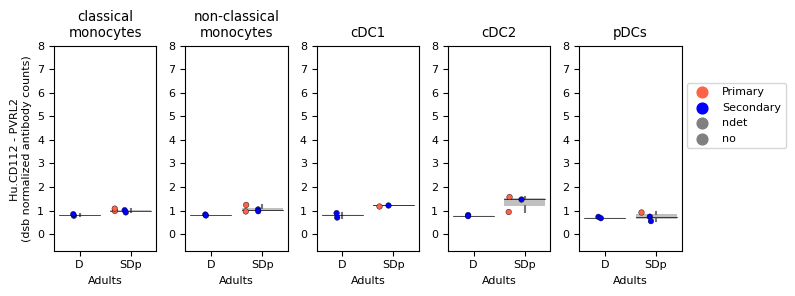

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


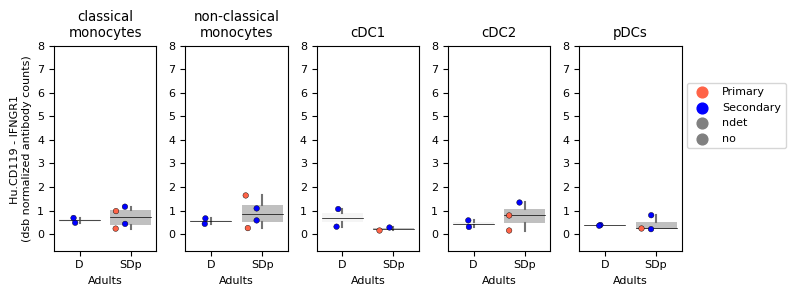

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


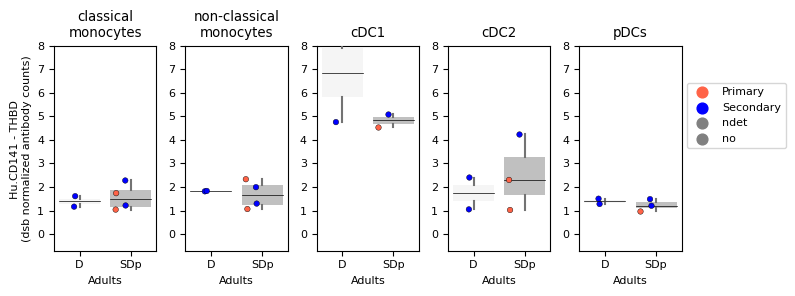

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


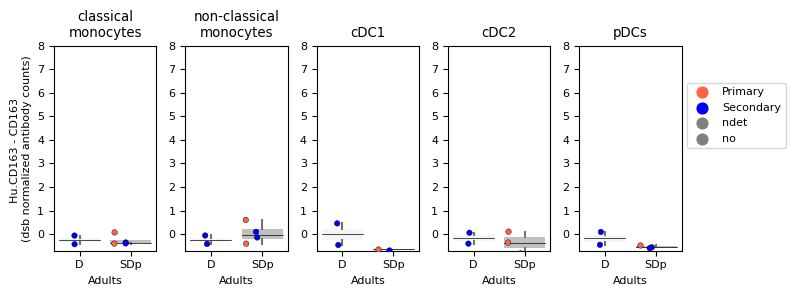

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


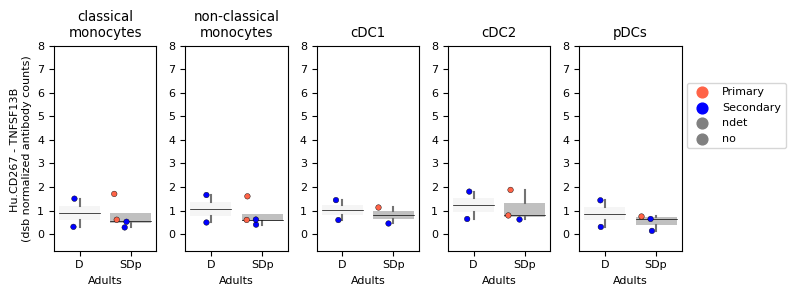

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


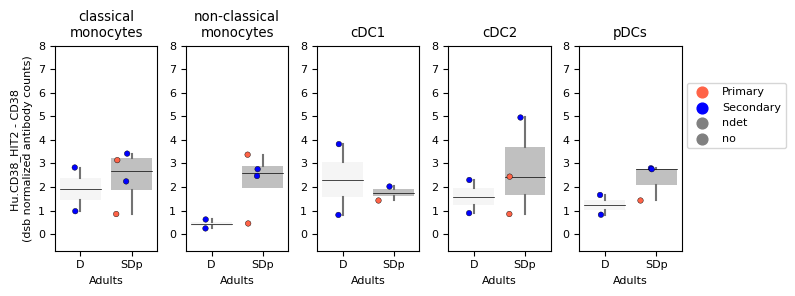

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


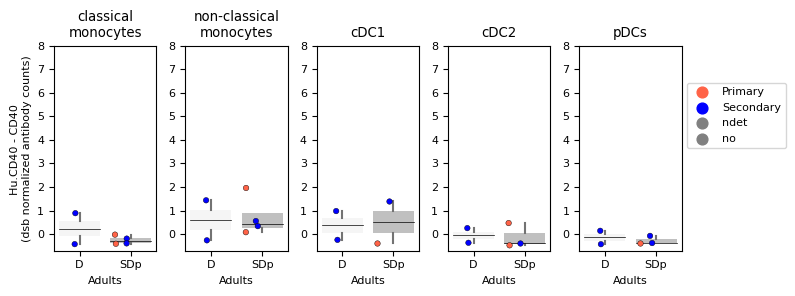

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


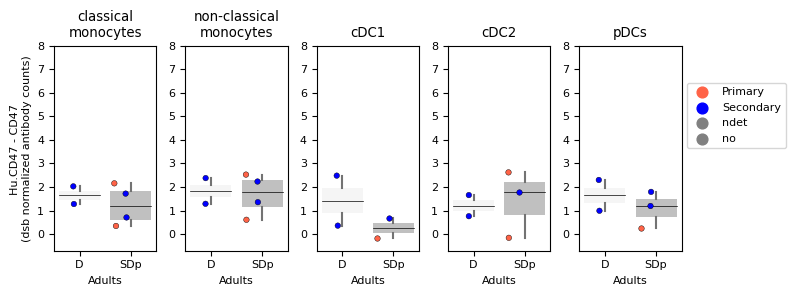

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


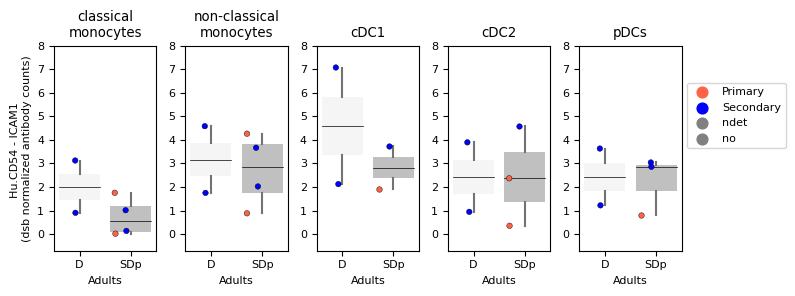

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


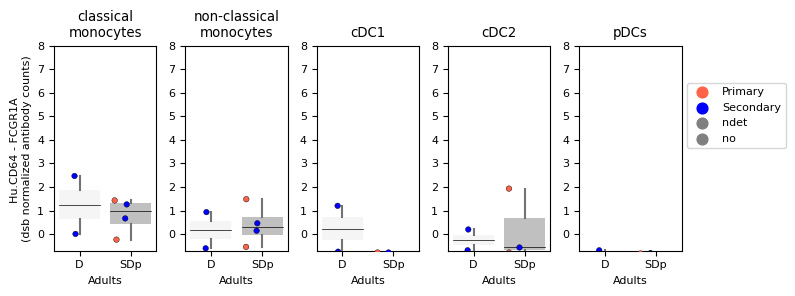

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


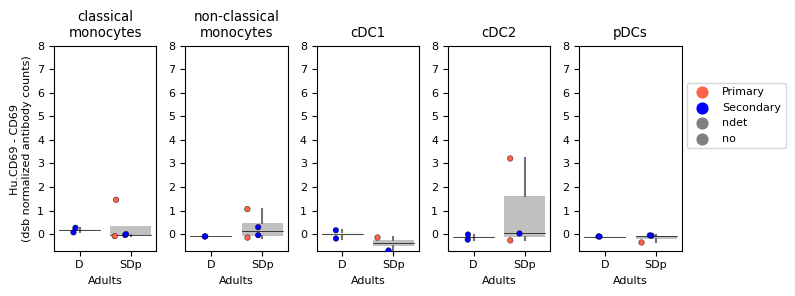

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


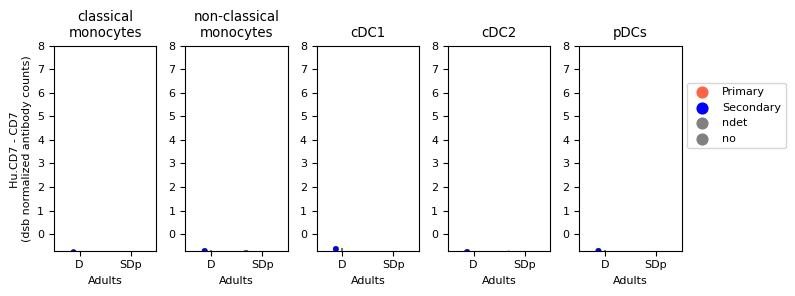

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


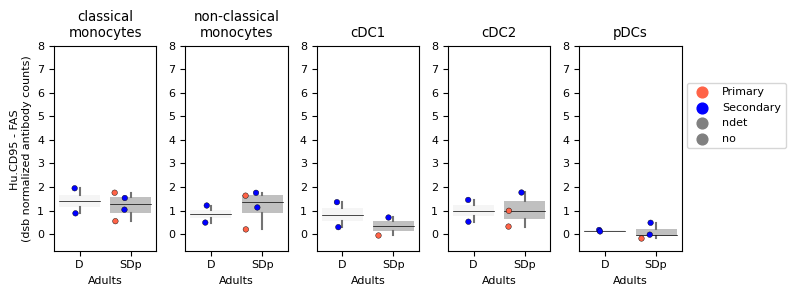

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


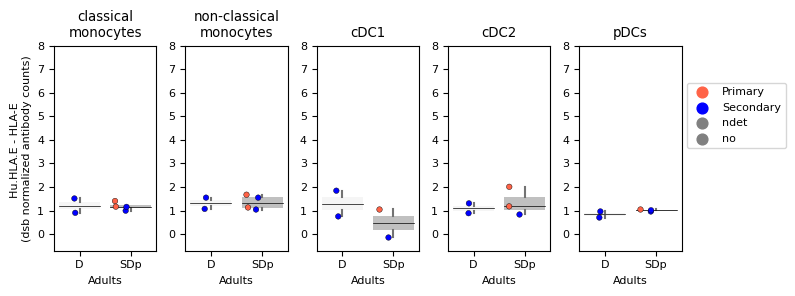

In [8]:
df = idmap[idmap.gene.isin(genes)]

for ind in df.index:
    gene = df.loc[ind].adt
    cts = ['classical monocytes', 'non-classical monocytes', 'cDC1', 'cDC2', 'pDCs',]
    fig, axs = plot_gene_expression(filtered, cts, gene, 
                                ylabel = f'{df.loc[ind]["all"]} \n(dsb normalized antibody counts)', 
                                figsize=[8, 3], ylim=8)
